Use decision tree classifier or regressor to predict the same categorical or quantitative variable that you predicted in Milestone 6. You should split your data into training and testing data for this milestone.
- Add the graph of the decision tree model based on the training data to your webpage.
- Use the testing data to make predictions and assess your model. If classifying, compute the confusion matrix and at least two of sensitivity, specificity, precision, or accuracy. If regressing, compute the mean squared error and plot the actual value (x axis) vs. the error or predicted value (y axis).
- Write a few sentences on your webpage summarizing the model (what does it appear to be basing its decisions on) and how well it performs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

%matplotlib inline

pd.set_option('display.max_columns', None)

cars = pd.read_csv("e_9-5-2019-no-sales-_9_4_2019public.csv")
c = ['Division','Mfr Name', 'Model Year', 'Carline', '# Cyl', 'Transmission',\
     'City FE (Guide) - Conventional Fuel',\
     'Hwy FE (Guide) - Conventional Fuel', 'Comb FE (Guide) - Conventional Fuel',\
     'Drive Desc', 'City CO2 Rounded Adjusted', 'FE Rating (1-10 rating on Label)',\
    'Annual Fuel1 Cost - Conventional Fuel'
    ]
cars = pd.read_csv("e_9-5-2019-no-sales-_9_4_2019public.csv", usecols = c)

cars.head(5)

,Model Year,Mfr Name,Division,Carline,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Drive Desc,Annual Fuel1 Cost - Conventional Fuel,FE Rating (1-10 rating on Label),City CO2 Rounded Adjusted
0,2019,Honda,Acura,NSX,6,Auto(AM-S9),21,22,21,All Wheel Drive,2150,4,419
1,2019,FCA US LLC,ALFA ROMEO,4C,4,Auto(AM6),24,34,28,"2-Wheel Drive, Rear",1600,6,365
2,2019,aston martin,Aston Martin Lagonda Ltd,Vantage V8,8,Auto(S8),18,25,21,"2-Wheel Drive, Rear",2150,4,494
3,2019,Volkswagen Group of,Audi,TT Roadster quattro,4,Auto(AM-S7),23,31,26,All Wheel Drive,1450,5,384
4,2019,BMW,BMW,Z4 sDrive30i,4,Auto(S8),25,32,28,"2-Wheel Drive, Rear",1600,6,355


We can get just the independent variables (x's) using the following:

In [3]:
X = cars.iloc[:,[6]]
X.head()

,City FE (Guide) - Conventional Fuel
0,21
1,24
2,18
3,23
4,25


In [4]:
y = cars["Annual Fuel1 Cost - Conventional Fuel"]

Next we created the decision tree variable (object) and then fit it to our data:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
reg = tree.DecisionTreeRegressor(max_depth = 3)
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

[Text(167.4, 190.26, 'X[0] <= 18.5\nentropy = 239997.15\nsamples = 1007\nvalue = 1896.425'),
 Text(83.7, 135.9, 'X[0] <= 14.5\nentropy = 146643.239\nsamples = 378\nvalue = 2354.101'),
 Text(41.85, 81.53999999999999, 'X[0] <= 12.5\nentropy = 141346.372\nsamples = 84\nvalue = 2861.905'),
 Text(20.925, 27.180000000000007, 'entropy = 133600.0\nsamples = 15\nvalue = 3470.0'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 45168.032\nsamples = 69\nvalue = 2729.71'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 16.5\nentropy = 53430.66\nsamples = 294\nvalue = 2209.014'),
 Text(104.625, 27.180000000000007, 'entropy = 42373.057\nsamples = 138\nvalue = 2349.638'),
 Text(146.475, 27.180000000000007, 'entropy = 30244.083\nsamples = 156\nvalue = 2084.615'),
 Text(251.10000000000002, 135.9, 'X[0] <= 24.5\nentropy = 94570.583\nsamples = 629\nvalue = 1621.383'),
 Text(209.25, 81.53999999999999, 'X[0] <= 21.5\nentropy = 33222.094\nsamples = 437\nvalue = 1783.295'),
 Text(188.32500000

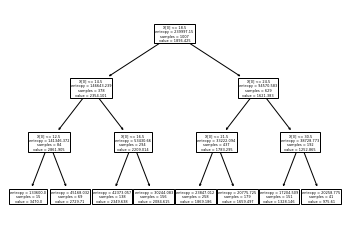

In [7]:
tree.plot_tree(reg)

In [8]:
dot_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("cars.dot")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'cars.dot'], make sure the Graphviz executables are on your systems' PATH

In [10]:
with open ("cars.dot", "r") as fin:
    with open("cars_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","City FE (Guide) - Conventional Fuel")
            fout.write(line)

In [11]:
((y_pred - y_test)**2).mean()

31123.84041091141

Text(0, 0.5, 'Predicted value - Annual cost')

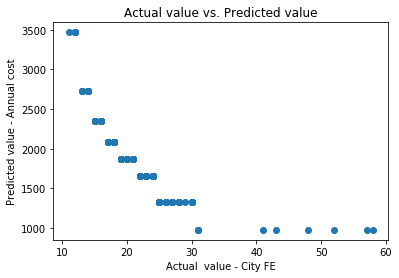

In [15]:
plt.scatter(X_test , y_pred)
plt.title('Actual value vs. Predicted value')
plt.xlabel('Actual  value - City FE')
plt.ylabel('Predicted value - Annual cost')

To figure out what max_depth should be, let's split our data into training and testing data.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, cars["Annual Fuel1 Cost - Conventional Fuel"], test_size=0.2)

Create a decision tree with max_depth = 3 from the training data:

In [29]:
reg3 = tree.DecisionTreeRegressor(max_depth = 3)
reg3 = reg3.fit(X_train, y_train)


Make predictions for the test data:

In [30]:
predictions_3 = reg3.predict(X_test)
predictions_3.shape
X_test.shape


(252, 1)

Compute the mean squared error for these predictions:

In [31]:
((y_test - predictions_3)**2).mean()

29845.166688127163

In [11]:
dot_data = tree.export_graphviz(reg3, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("cars_depth3.dot")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'cars_depth3.dot'], make sure the Graphviz executables are on your systems' PATH

In [32]:
with open ("cars_depth3.dot", "r") as fin:
    with open("cars_depth3_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","# Cyl")
            line = line.replace("X[1]","City FE (Guide) - Conventional Fuel")
            fout.write(line)

confusion matrix

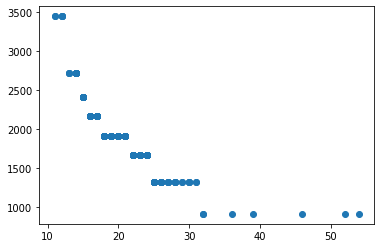

In [34]:
import seaborn as sns
X_test.shape

plt.scatter(X_test , predictions_3)

# sns.relplot(x = X_test, y = predictions_3, data = cars)


In [20]:
predictions_3.shape

(252,)

In [21]:
X_test

,# Cyl,City FE (Guide) - Conventional Fuel
1123,4,19
615,6,16
1189,6,16
880,4,21
1027,4,25
976,4,23
937,6,20
642,4,55
809,6,17
500,4,29
